In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wealth-management-customer-data/Bank_Customers.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/wealth-management-customer-data/Bank_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the summary of the dataset
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RowNumber            10000 non-null  float64
 1   CustomerID           10000 non-null  float64
 2   Surname              10000 non-null  object 
 3   CreditScore          10000 non-null  float64
 4   Country              10000 non-null  object 
 5   Gender               10000 non-null  object 
 6   Married              10000 non-null  float64
 7   Age                  10000 non-null  float64
 8   Dependents           10000 non-null  float64
 9   NumBankAccts         10000 non-null  float64
 10  HasCrCard            10000 non-null  float64
 11  EmergingMarketFund   10000 non-null  float64
 12  RealEstate           10000 non-null  float64
 13  PrivateEquity        10000 non-null  float64
 14  GovtBonds            10000 non-null  float64
 15  CorpBonds            10000 non-null 

(   RowNumber  CustomerID   Surname  CreditScore Country  Gender  Married  \
 0        1.0  15634602.0  Hargrave        619.0  France  Female      1.0   
 1        2.0  15647311.0      Hill        608.0   Spain  Female      1.0   
 2        3.0  15619304.0      Onio        502.0  France  Female      1.0   
 3        4.0  15701354.0      Boni        699.0  France  Female      1.0   
 4        5.0  15737888.0  Mitchell        850.0   Spain  Female      1.0   
 
     Age  Dependents  NumBankAccts  ...  LifeInsurance  NumTransactions  \
 0  42.0         3.0           1.0  ...            1.0              5.0   
 1  41.0         2.0           1.0  ...            1.0              8.0   
 2  42.0         2.0           3.0  ...            0.0              3.0   
 3  39.0         0.0           2.0  ...            0.0              5.0   
 4  43.0         0.0           1.0  ...            1.0              2.0   
 
    LastTransactionDate  LastTransactionAmt  ForeignAssets  NumProducts  Churn  \
 0

In [3]:
# Checking the percentage of missing values per column
missing_values = data.isnull().mean() * 100
missing_values[missing_values > 0]


RowNumber                0.009999
CustomerID               0.009999
Surname                  0.009999
CreditScore              0.009999
Country                  0.009999
Gender                   0.009999
Married                  0.009999
Age                      0.009999
Dependents               0.009999
NumBankAccts             0.009999
HasCrCard                0.009999
EmergingMarketFund       0.009999
RealEstate               0.009999
PrivateEquity            0.009999
GovtBonds                0.009999
CorpBonds                0.009999
ETF Tech                 0.009999
ETF Health               0.009999
EstimatedSalary          0.009999
Mortgage                 0.009999
Risk Profile             0.009999
Debt                     0.009999
Net Assets               0.009999
Portfolio Return         0.009999
Diversification          0.009999
BusinessOwner            0.009999
Revenue                  0.009999
Margin                   0.009999
LifeInsurance            0.009999
NumTransaction

In [4]:
# Drop the columns 'Retention' and 'CLV' completely
data_cleaned = data.drop(['Retention', 'CLV'], axis=1)

# Drop rows with any remaining missing values
data_cleaned = data_cleaned.dropna()

# Verify the cleaning by checking missing values again
data_cleaned.isnull().sum().max()


0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


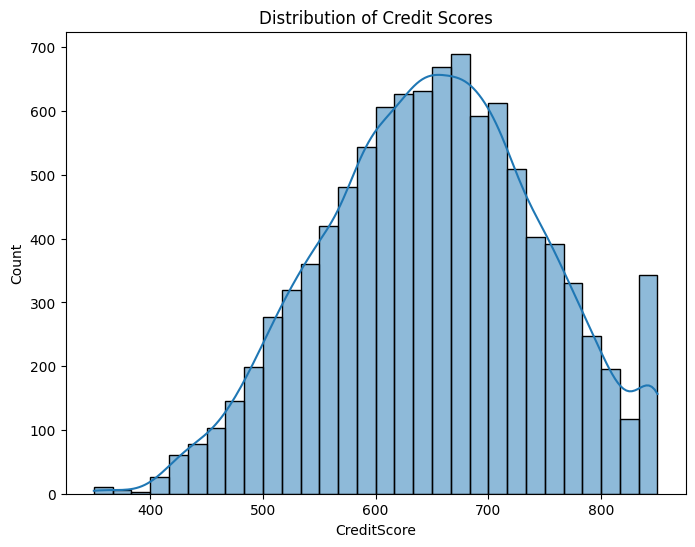

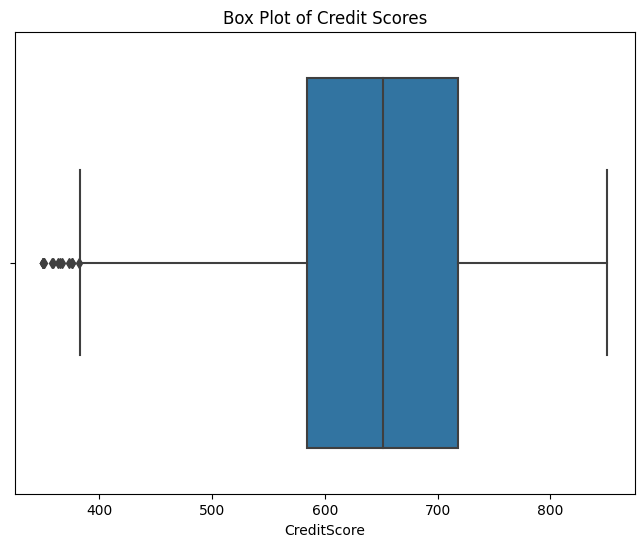

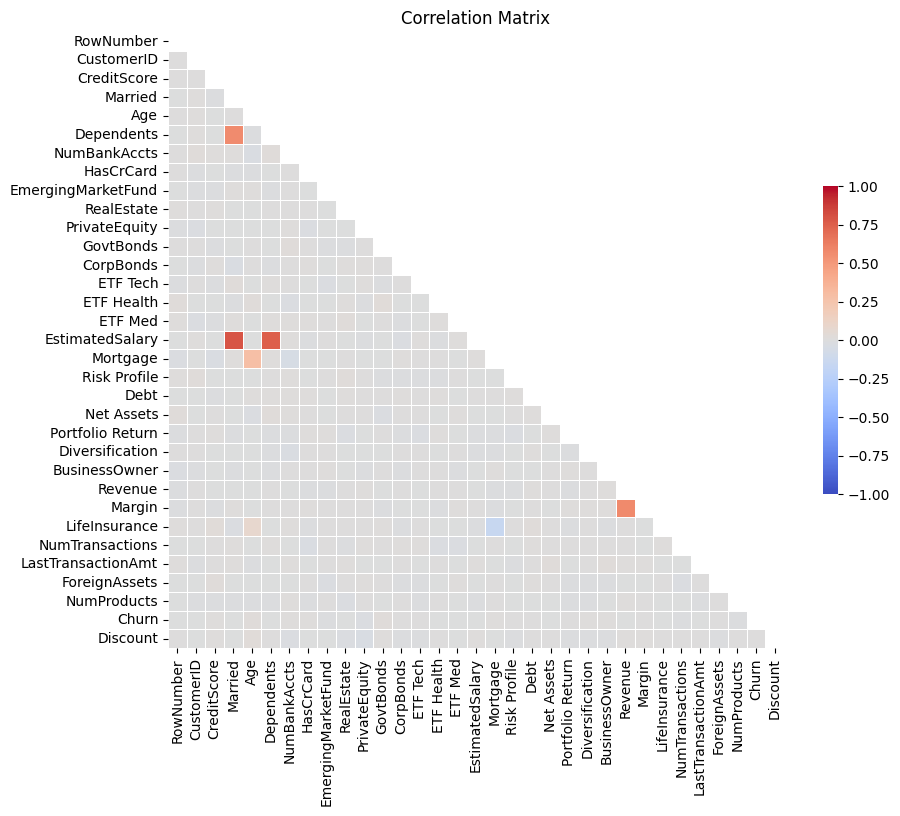

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
# data = pd.read_csv('path_to_your_file.csv')

# Drop columns with high percentage of missing values and rows with any missing values
data_cleaned = data.drop(columns=['Retention', 'CLV']).dropna()

# Histogram of Credit Scores
plt.figure(figsize=(8, 6))
sns.histplot(data=data_cleaned, x='CreditScore', bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.show()

# Box plot for Credit Scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['CreditScore'])
plt.title('Box Plot of Credit Scores')
plt.show()

# Correlation matrix heatmap
# Select only numeric data for correlation calculation
numeric_data = data_cleaned.select_dtypes(include=[np.number])
corr = numeric_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

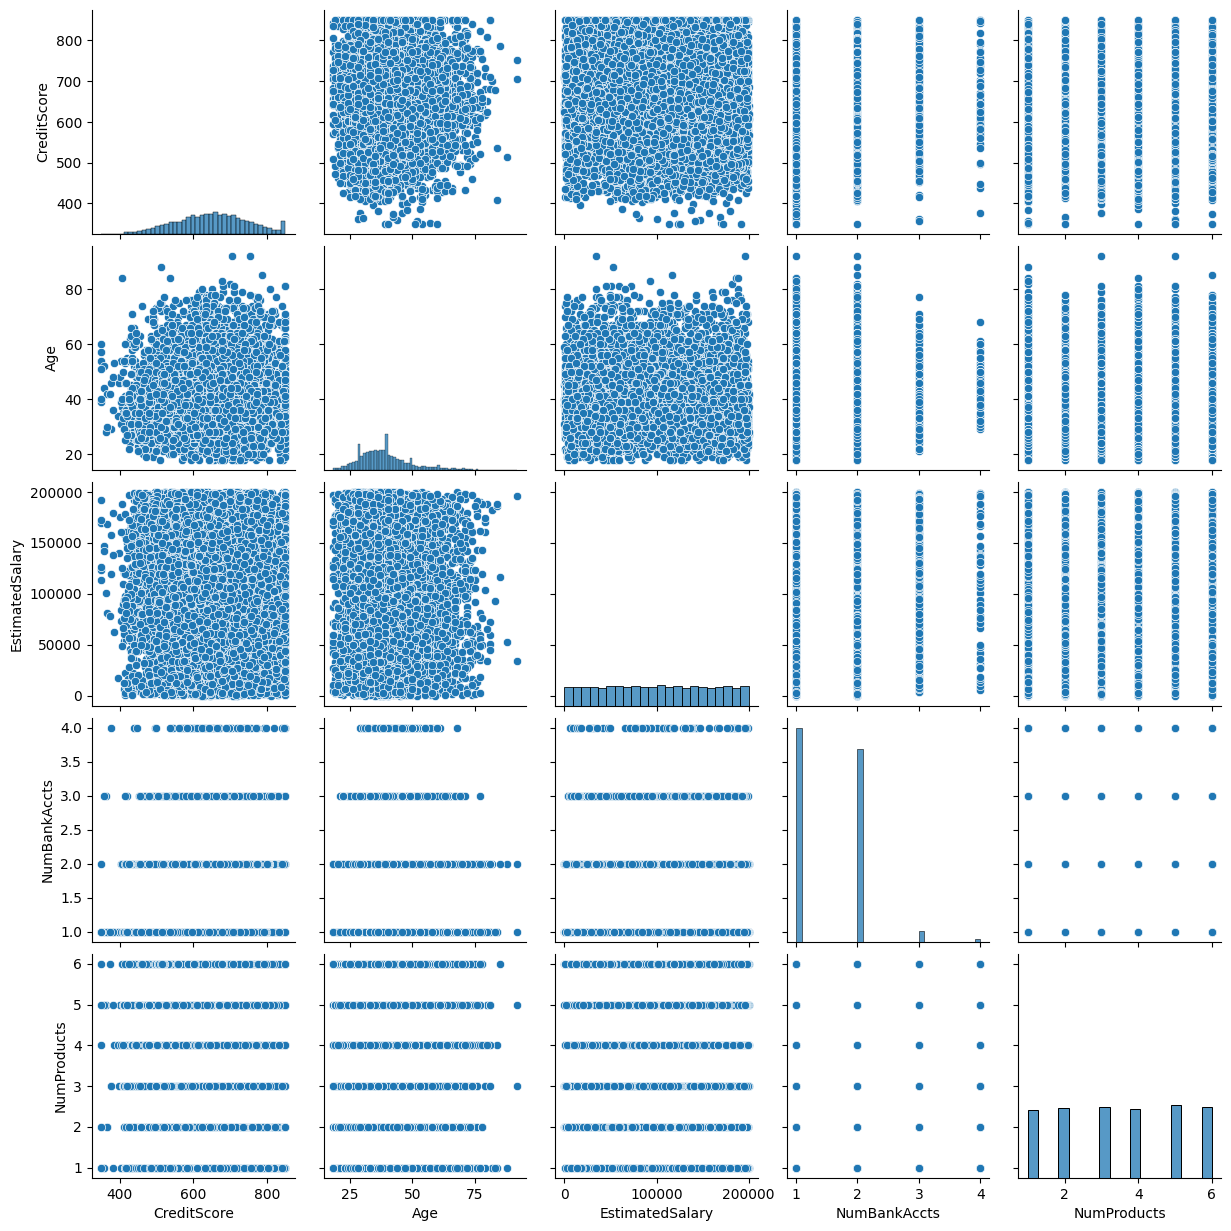

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numeric columns for better visualization
columns_to_plot = ['CreditScore', 'Age', 'EstimatedSalary', 'NumBankAccts', 'NumProducts']
sns.pairplot(data_cleaned[columns_to_plot])
plt.show()


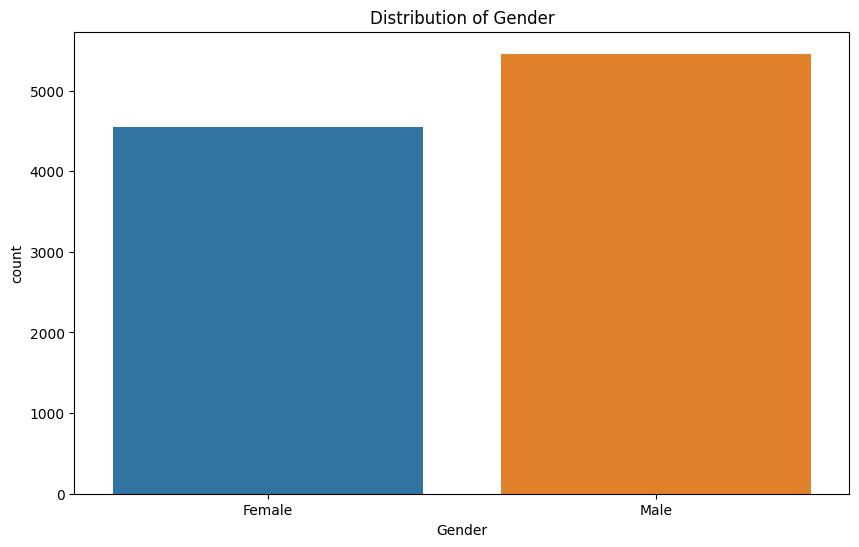

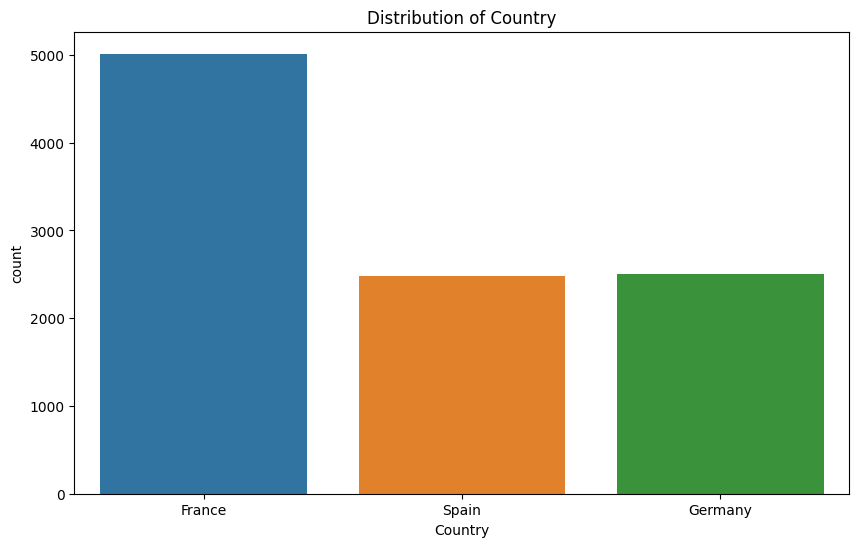

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data_cleaned)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=data_cleaned)
plt.title('Distribution of Country')
plt.show()


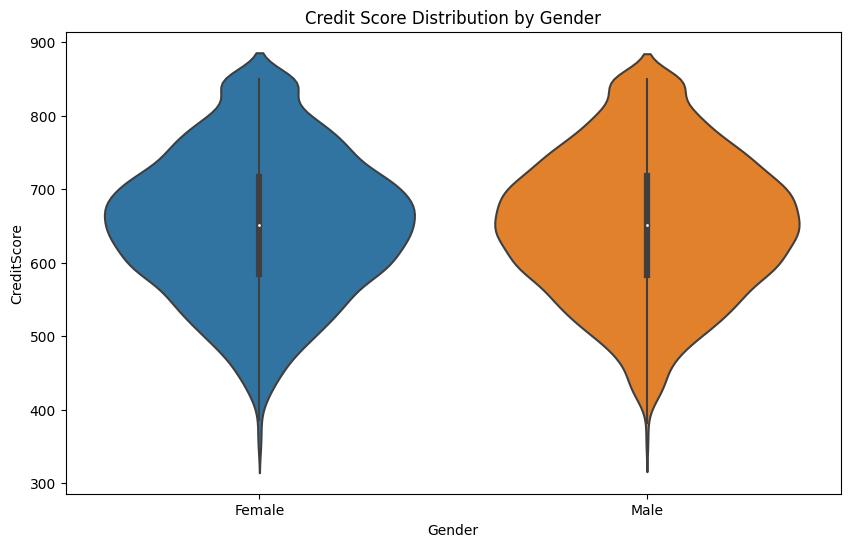

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='CreditScore', data=data_cleaned)
plt.title('Credit Score Distribution by Gender')
plt.show()


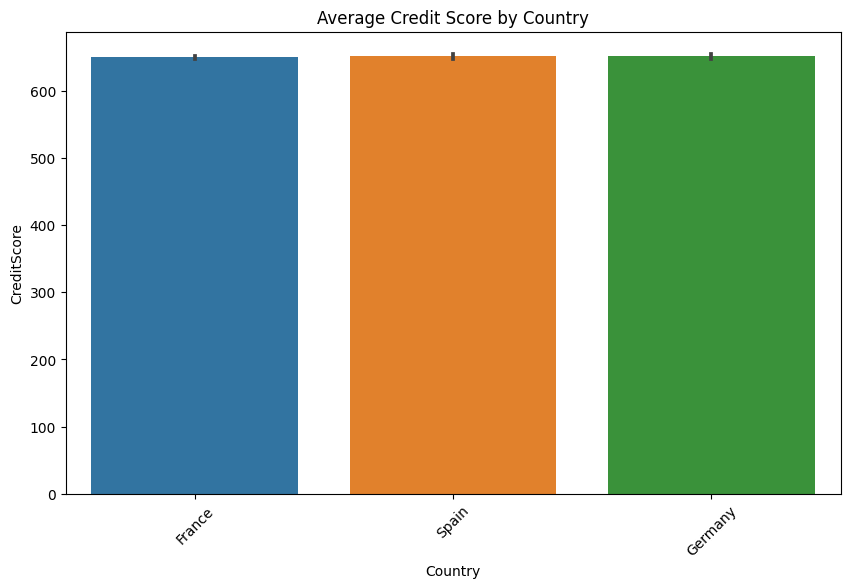

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='CreditScore', data=data_cleaned)
plt.title('Average Credit Score by Country')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


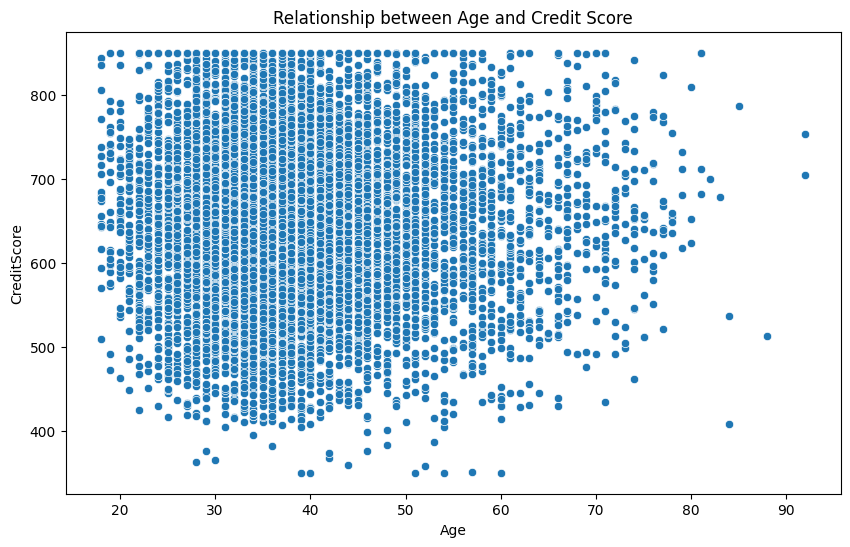

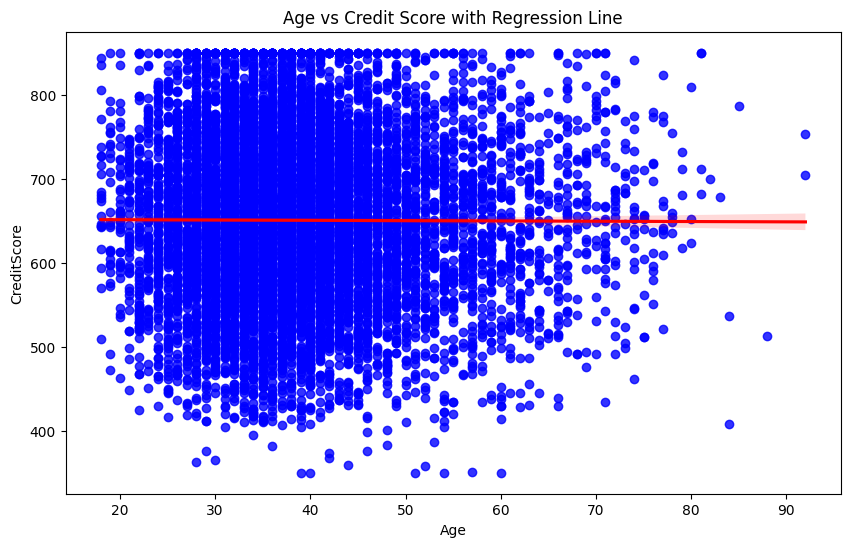

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CreditScore', data=data_cleaned)
plt.title('Relationship between Age and Credit Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='CreditScore', data=data_cleaned, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Age vs Credit Score with Regression Line')
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/kaggle/input/wealth-management-customer-data/Bank_Customers.csv')

# Drop columns with missing values or that won't be used
data = data.drop(columns=['Retention', 'CLV', 'RowNumber', 'CustomerID', 'Surname'])

# Define categorical and numeric features
categorical_features = ['Country', 'Gender']  # Update this list based on your data
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('CreditScore')  # Exclude the target variable from features

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare target variable
X = data.drop('CreditScore', axis=1)
y = data['CreditScore']

# Split the data into training and testing sets
# Checking for NaNs in the original target column
print("NaN in original data:", data['CreditScore'].isnull().any())

# If there are NaNs, you can choose to fill them with the median or mean, or drop them
data = data.dropna(subset=['CreditScore'])  # Option to drop
# data['CreditScore'].fillna(data['CreditScore'].median(), inplace=True)  # Option to fill

# Re-run the preprocessing steps
X = data.drop('CreditScore', axis=1)
y = data['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



NaN in original data: True


In [12]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


2024-05-08 14:04:00.947369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 14:04:00.947445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 14:04:00.949227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 424719.9062 - mae: 644.4014 - val_loss: 296517.9062 - val_mae: 530.9546
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180192.7031 - mae: 377.9651 - val_loss: 16207.4238 - val_mae: 101.1098
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36031.7734 - mae: 150.6620 - val_loss: 10691.1689 - val_mae: 83.4699
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35625.2305 - mae: 150.1984 - val_loss: 10511.9863 - val_mae: 83.0230
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33047.0156 - mae: 144.6968 - val_loss: 10743.7041 - val_mae: 84.2853
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33590.1250 - mae: 146.5127 - val_loss: 10791.2764 - val_mae: 84.2468
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32447.5898 - mae: 143.4084 - val_loss: 10773.4590 - val_mae: 84.2519
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29940.8652 - mae: 137.5941 - val

In [14]:
import numpy as np

def predict_and_categorize(model, data, preprocessor):
    """
    Predicts the credit score and categorizes the financial status based on the score.
    
    Args:
    model: Trained Keras model for credit score prediction.
    data: Input data for prediction (should be a DataFrame with the same structure as training data minus the target).
    preprocessor: The preprocessor used during model training (for scaling/encoding).

    Returns:
    A prediction and its corresponding category.
    """
    # Preprocess the data
    data_transformed = preprocessor.transform(data)
    
    # Make a prediction
    predicted_score = model.predict(data_transformed)
    
    # Squeeze to convert from 2D to 1D array if necessary
    predicted_score = np.squeeze(predicted_score)
    
    # Categorize based on the predicted score
    if predicted_score >= 700:
        category = 'Wealthy'
    elif predicted_score >= 650:
        category = 'Average'
    else:
        category = 'Poor'
    
    return predicted_score, category

# Example of preparing a sample for prediction (assuming 'data' is your DataFrame)
sample_data = data.drop('CreditScore', axis=1).iloc[0:1]  # Selecting the first row as a sample

# Predict and categorize
score, category = predict_and_categorize(model, sample_data, preprocessor)
print(f"Predicted Credit Score: {score}, Category: {category}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Credit Score: 560.3268432617188, Category: Poor


In [15]:
def predict_and_categorize_all(model, data, preprocessor):
    """
    Predicts the credit score for an entire dataset and categorizes each prediction.
    It also calculates the percentage of each category.

    Args:
    model: Trained Keras model for credit score prediction.
    data: Dataset for prediction (DataFrame excluding the target variable).
    preprocessor: Preprocessor used during model training.

    Returns:
    Dictionary with percentages for each category.
    """
    # Preprocess the data
    data_transformed = preprocessor.transform(data)
    
    # Make predictions
    predicted_scores = model.predict(data_transformed)
    predicted_scores = np.squeeze(predicted_scores)  # Flatten array if necessary

    # Categorize predictions
    categories = np.where(predicted_scores >= 700, 'Wealthy',
                          np.where(predicted_scores >= 650, 'Average', 'Poor'))
    
    # Calculate percentages
    unique, counts = np.unique(categories, return_counts=True)
    percentages = dict(zip(unique, counts * 100 / len(categories)))
    
    return percentages

# Example usage: assuming 'data' is your full DataFrame without the target variable
full_data = data.drop('CreditScore', axis=1)  # Dropping the target column

# Get the category percentages
category_percentages = predict_and_categorize_all(model, full_data, preprocessor)
print("Category Percentages:", category_percentages)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Category Percentages: {'Average': 29.03, 'Poor': 69.8, 'Wealthy': 1.17}


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


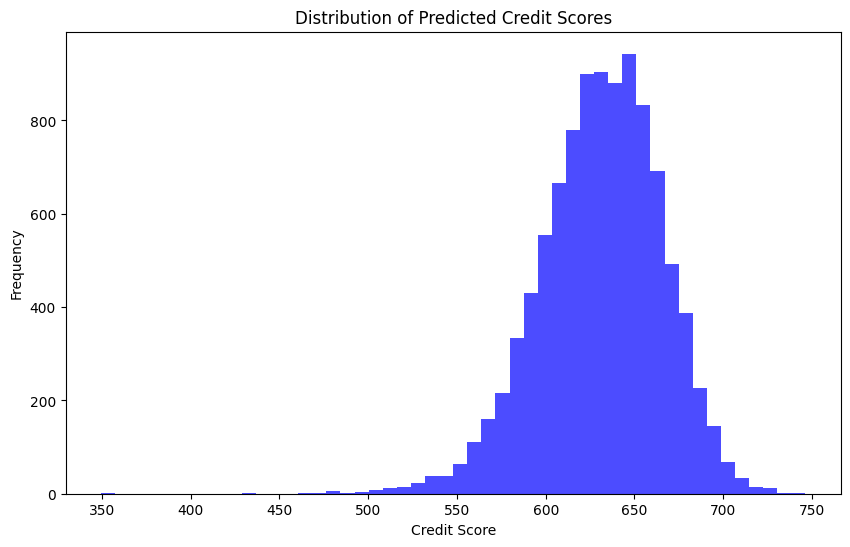

In [16]:
import matplotlib.pyplot as plt

def visualize_predictions(model, data, preprocessor):
    """ Function to plot the distribution of predicted credit scores. """
    data_transformed = preprocessor.transform(data)
    predicted_scores = model.predict(data_transformed)
    predicted_scores = np.squeeze(predicted_scores)

    plt.figure(figsize=(10, 6))
    plt.hist(predicted_scores, bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of Predicted Credit Scores')
    plt.xlabel('Credit Score')
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of predicted credit scores
visualize_predictions(model, full_data, preprocessor)
